In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# 1.missing values
# 2.explore about categorical variables
# 3.explore about numerical variables
# 4.finding relationship between features

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

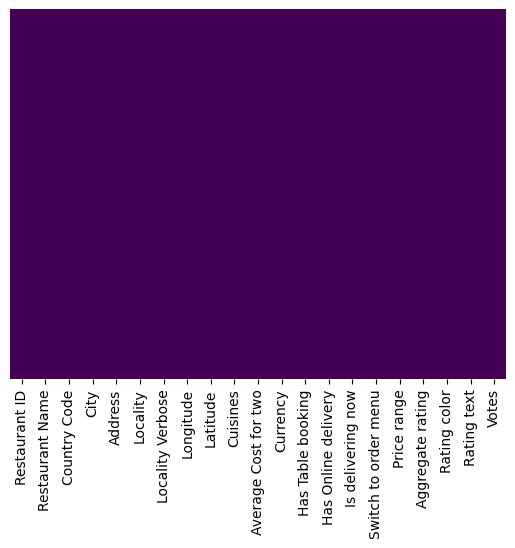

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_country=pd.read_excel('Country-Code.xlsx')

In [11]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [13]:
country_names=final_df.Country.value_counts().index

In [21]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1f380937e00>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, "'94.39%'"),
  Text(0.5876081980578747, -0.12131201743923574, "'4.73%'"),
  Text(0.5997744672089791, -0.01644957398187513, "'0.87%'")])

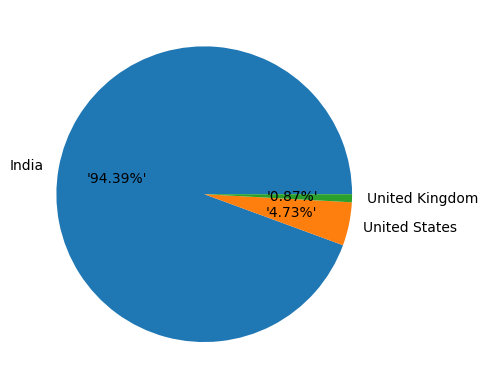

In [22]:
plt.pie(country_val[:3],labels=country_names[:3],autopct="'%1.2f%%'")

Zomatos maximum transactions are from India after that USA and then UK.

In [28]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

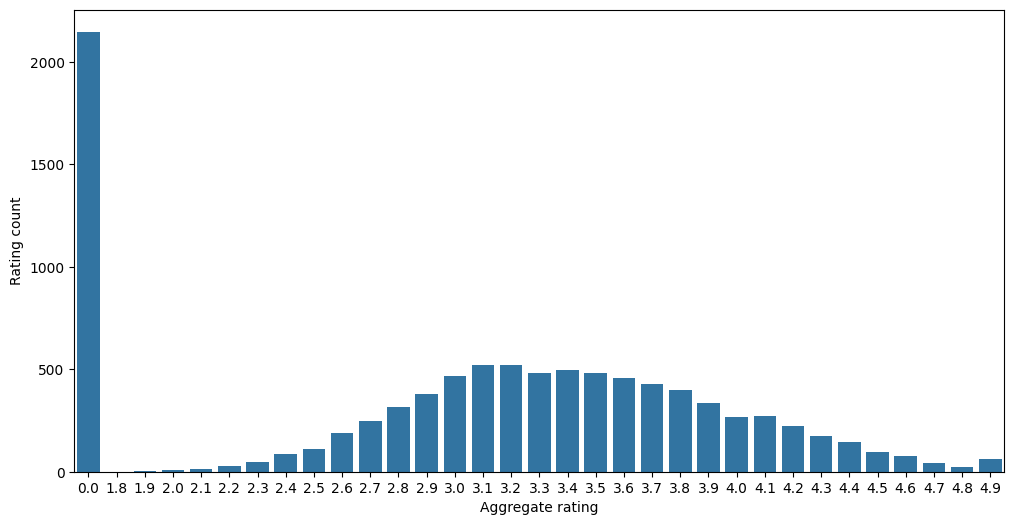

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='Aggregate rating',y='Rating count',data=ratings)

C:\Users\mohin\AppData\Local\Temp\ipykernel_23372\504387056.py:1: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color', data=ratings,palette=['white','red','orange','yellow','green',])


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

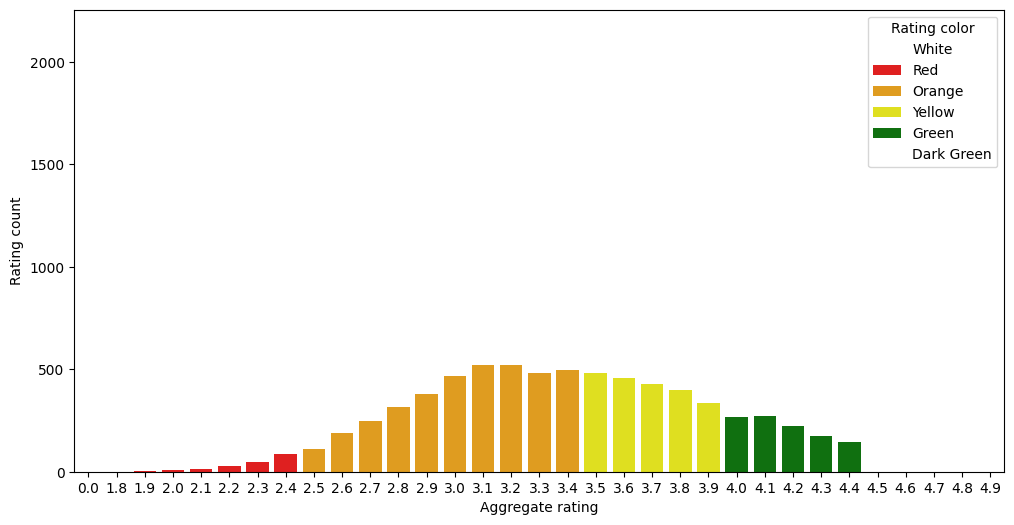

In [34]:
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color', data=ratings,palette=['white','red','orange','yellow','green',])

1.not rated count is high
2.max ratings bewtween 2.5 to 3.4

C:\Users\mohin\AppData\Local\Temp\ipykernel_23372\4030062804.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="Rating color",data=ratings,hue='Rating color',palette=['white','red','orange','yellow','green',])


<Axes: xlabel='Rating color', ylabel='count'>

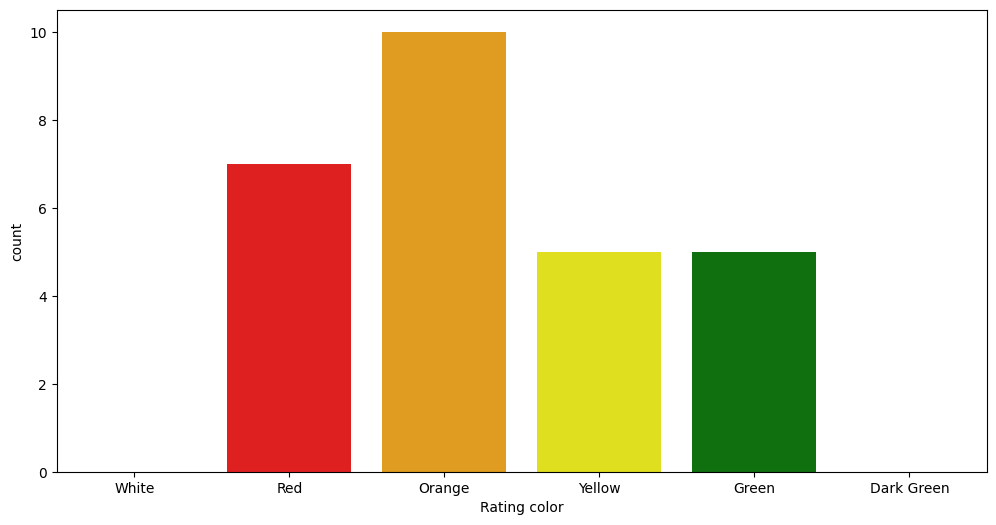

In [36]:
# count plot
sns.countplot(x="Rating color",data=ratings,hue='Rating color',palette=['white','red','orange','yellow','green',])

In [40]:
# find countries that have given 0 ratings

final_df[final_df['Aggregate rating']==0].groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


max number of 0 ratings are from India

In [43]:
# which currency is used by which country
# find countries that have given 0 ratings

final_df[['Country','Currency']].groupby(['Currency','Country']).size().reset_index().head(5)

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20


In [44]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [46]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


([<matplotlib.patches.Wedge at 0x1f3856abb10>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')],
 [Text(-0.33520111256309454, 0.4976346191097074, "'68.87%'"),
  Text(0.03401877210771504, -0.5990348263200423, "'14.07%'"),
  Text(0.479402302589221, -0.36079555467349217, "'13.59%'"),
  Text(0.5957573717516791, -0.07122607671022996, "'3.16%'"),
  Text(0.5999706967742853, -0.00592984082236598, "'0.31%'")])

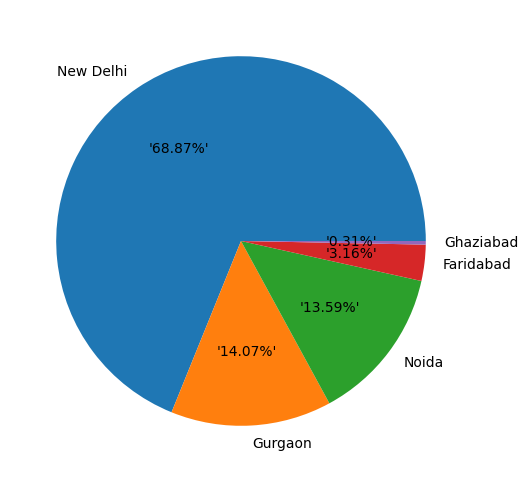

In [51]:
city_val=final_df.City.value_counts().values
city_names=final_df.City.value_counts().index
plt.pie(city_val[:5],labels=city_names[:5],autopct="'%1.2f%%'")

In [52]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

,Aggregate rating,Cuisines,0
3914,4.9,"North Indian, South Indian, Mughlai",1
3915,4.9,"Pizza, Sandwich",1
3916,4.9,"Sandwich, Seafood, Cajun",1
3917,4.9,Seafood,1
3918,4.9,Steak,1
3919,4.9,"Sunda, Indonesian",3
3920,4.9,"Sushi, Japanese",1
3921,4.9,"Taiwanese, Street Food",1
3922,4.9,Tapas,1
3923,4.9,World Cuisine,1


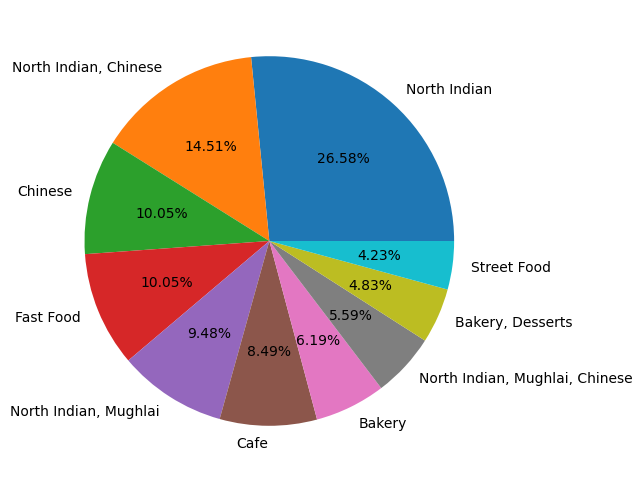

In [55]:
# top 10 cuisines

cus_values = final_df["Cuisines"].value_counts().values
cus_labels = final_df["Cuisines"].value_counts().index
plt.pie(cus_values[:10],labels=cus_labels[:10],autopct='%1.2f%%')
# (With respect to Aggregate rating)
final_df[['Aggregate rating','Cuisines']].groupby(['Aggregate rating','Cuisines']).size().reset_index().tail(10)